## Importing Libraries

In [26]:
import tensorflow as tf
from tensorflow.keras import regularizers, Sequential, initializers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten 
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [2]:
tf.__version__

'2.13.0'

## Importing Dataset

In [3]:
train_dir = 'D:/New folder/Project/train'
test_dir = 'D:/New folder/Project/test'

In [4]:
image_size = 224
batch_size = 32

## Preprocessing

In [5]:
train_set = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                        batch_size= batch_size,
                                                        image_size= (image_size, image_size))

Found 220 files belonging to 2 classes.


In [6]:
test_set = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                       batch_size= batch_size,
                                                       image_size= (image_size, image_size))

Found 80 files belonging to 2 classes.


In [7]:
class_names = ['man', 'woman']
class_names

['man', 'woman']

In [8]:
train_ds = train_set.prefetch(tf.data.AUTOTUNE)
test_ds = test_set.prefetch(tf.data.AUTOTUNE)

## Labelling Image

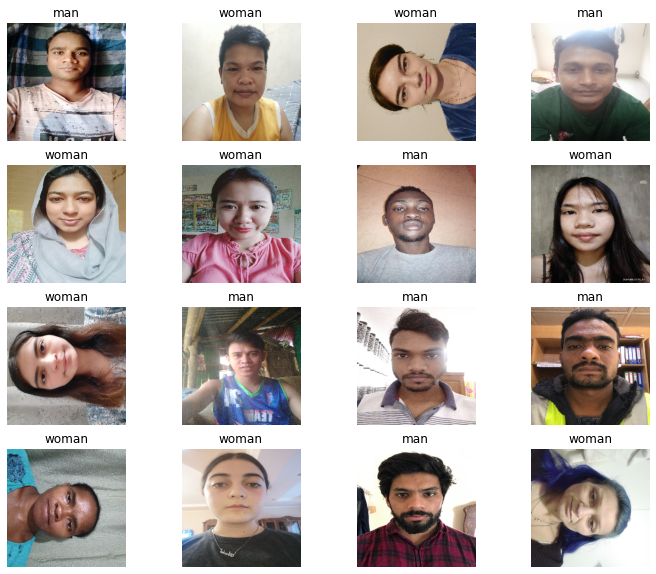

In [9]:
for image, label in train_set.take(1):
    plt.figure(figsize= (12,10))
    
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [10]:
data_augmentation = Sequential([tf.keras.layers.Resizing(180, 180),
                                tf.keras.layers.RandomFlip('horizontal_and_vertical')])

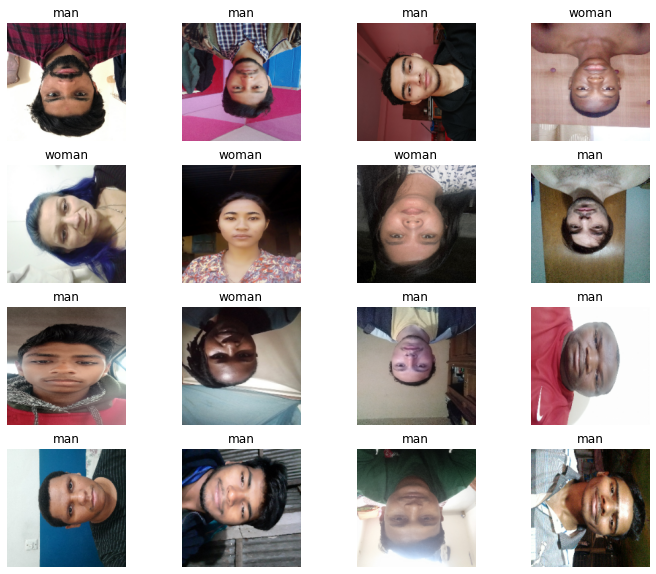

In [11]:
for image, label in train_set.take(1):
    plt.figure(figsize= (12,10))
    
    for i in range(16):
        plt.subplot(4,4, i+1)
        augmented_image = data_augmentation(image)
        plt.imshow(augmented_image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis('off')

## Building a Model

In [12]:
regularizer = regularizers.l1(0.001)
initializer = initializers.HeNormal(seed=20)

model = Sequential([
    data_augmentation,
    Conv2D(64, 3, activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizer),
    MaxPool2D((2, 2)),
    Conv2D(32, 3, activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizer),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(10, activation="sigmoid")
])

In [13]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [14]:
hist = model.fit(x= train_ds,validation_data= test_ds, epochs= 15)

Epoch 1/15
7/7 [==============================] - 21s 2s/step - loss: 769.7839 - accuracy: 0.4364 - val_loss: 257.0449 - val_accuracy: 0.5000
Epoch 2/15
7/7 [==============================] - 18s 2s/step - loss: 70.1001 - accuracy: 0.4909 - val_loss: 3.0793 - val_accuracy: 0.4250
Epoch 3/15
7/7 [==============================] - 18s 2s/step - loss: 2.9281 - accuracy: 0.5409 - val_loss: 3.2030 - val_accuracy: 0.4625
Epoch 4/15
7/7 [==============================] - 18s 2s/step - loss: 3.0863 - accuracy: 0.5182 - val_loss: 3.2230 - val_accuracy: 0.4250
Epoch 5/15
7/7 [==============================] - 18s 2s/step - loss: 2.9726 - accuracy: 0.4591 - val_loss: 2.9327 - val_accuracy: 0.4500
Epoch 6/15
7/7 [==============================] - 18s 2s/step - loss: 2.7575 - accuracy: 0.5500 - val_loss: 2.8814 - val_accuracy: 0.5125
Epoch 7/15
7/7 [==============================] - 18s 2s/step - loss: 2.6214 - accuracy: 0.6227 - val_loss: 3.0568 - val_accuracy: 0.5250
Epoch 8/15
7/7 [=============

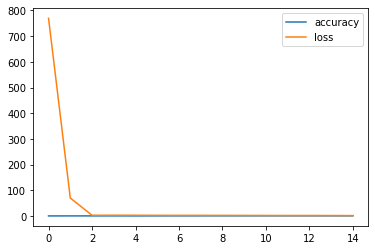

In [15]:
plt.plot(hist.history['accuracy'], label= 'accuracy')
plt.plot(hist.history['loss'], label= 'loss')
plt.legend()

In [22]:
from sklearn.metrics import f1_score

## Predicting Multiple Image

1/1 [==============================] - 0s 62ms/step
[1]
1/1 [==============================] - 0s 62ms/step
[0]
1/1 [==============================] - 0s 47ms/step
[0]
1/1 [==============================] - 0s 63ms/step
[0]
1/1 [==============================] - 0s 64ms/step
[0]
1/1 [==============================] - 0s 63ms/step
[0]
1/1 [==============================] - 0s 67ms/step
[0]
1/1 [==============================] - 0s 57ms/step
[0]
1/1 [==============================] - 0s 62ms/step
[1]
1/1 [==============================] - 0s 66ms/step
[0]
1/1 [==============================] - 0s 58ms/step
[1]
1/1 [==============================] - 0s 63ms/step
[0]
1/1 [==============================] - 0s 63ms/step
[0]
1/1 [==============================] - 0s 63ms/step
[0]
1/1 [==============================] - 0s 65ms/step
[1]
1/1 [==============================] - 0s 60ms/step
[1]


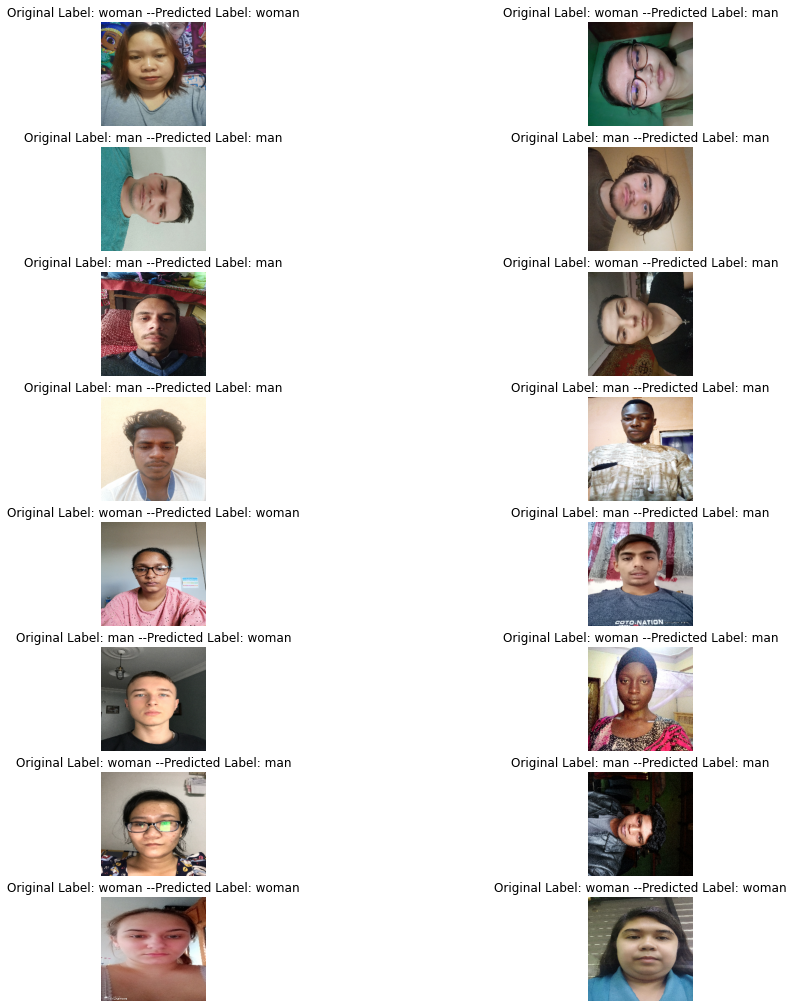

In [23]:
for image, label in test_ds.take(1):
    plt.figure(figsize= (16,18))
    
    for i in range(16):
        plt.subplot(8,2,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        pred = model.predict(tf.expand_dims(image[i], axis= 0))
        prediction = np.argmax(pred, axis= 1)
        print(prediction)
        plt.title(f"Original Label: {class_names[label[i]]} --Predicted Label: {class_names[int(prediction)]}")
        plt.axis('off')

## Prediction of Single Image

In [29]:
test_image = image.load_img('D:/Prediction/116.jpg',target_size = (224, 224))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)


if result[0][0] == 1:
  prediction = 'male'
else:
  prediction = 'female'

1/1 [==============================] - 0s 67ms/step


In [30]:
print(prediction)

male
